<h1>Exploratory Data Analysis Penjualan Adidas</h1>
<H3>Team Assignment 5 by Kelompok 3</H3>
• Erni Nur Pratiwi</br>
• Kristina Larissa Tjandrawijaya</br>
• M. Rizky Bayu Aji</br>
• Radif Ramadan</br>
• Thomas Aquino

<h3>Dataset</h3>

[Link to Kaggle "Adidas US Sales Datasets"]("https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset")

<h3>Pemahaman Bisnis</h3>
Adidas, sebuah merek olahraga global, bertujuan untuk menganalisis data penjualannya di pasar AS untuk memahami kinerja di berbagai wilayah, jenis produk, dan saluran penjualan.

<h3>Masalah Bisnis</h3>
Mengidentifikasi faktor-faktor kunci yang mempengaruhi kinerja penjualan, termasuk wilayah dengan kinerja tinggi, kategori produk, dan metode penjualan, untuk mengoptimalkan strategi masa depan dan meningkatkan profitabilitas secara keseluruhan.

<h3>Pemangku Kepentingan</h3>
	•	Perusahaan: Adidas <br>
	•	Departemen: Penjualan, Pemasaran, Keuangan

<h3>Urgensi</h3>
Memahami kinerja penjualan sangat penting untuk membuat keputusan yang didasarkan pada data, mengoptimalkan inventaris, menargetkan upaya pemasaran, dan meningkatkan profitabilitas.

<h3>Tujuan</h3>
<ol>
<li>Menganalisis kinerja penjualan di berbagai wilayah dan kota.</li>
<li>Mengidentifikasi produk dan kategori produk yang memiliki volume penjualan tertinggi.</li>
<li>Membandingkan efektivitas berbagai metode penjualan (in-store vs. online).</li>
<li>Menentukan dampak harga pada volume penjualan dan keuntungan.</li>
</ol>

<h3>Pertanyaan Bisnis</h3>
<ol>
<li>Wilayah mana yang menghasilkan total penjualan tertinggi?</li>
<li>Kota mana di dalam wilayah dengan kinerja tertinggi yang menghasilkan penjualan paling banyak?</li>
<li>Kategori produk apa yang memiliki volume penjualan tertinggi?</li>
<li>Berapa rata-rata margin keuntungan operasional di berbagai wilayah?</li>
<li>Bagaimana kinerja penjualan in-store dibandingkan dengan penjualan online?</li>
<li>Berapa harga rata-rata per unit untuk produk yang paling laris?</li>
<li>Bagaimana tren musiman mempengaruhi volume penjualan dan keuntungan?</li>
<li>Retailer mana yang menyumbang paling banyak untuk total penjualan?</li>
<li>Apa korelasi antara unit yang terjual dan total penjualan?</li>
<li>Bagaimana margin operasional bervariasi di berbagai kategori produk?</li>
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Downloads/Adidas US Sales Datasets.xlsx'
df = pd.read_excel(file_path, sheet_name='Data Sales Adidas', skiprows=4)

df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [2]:
# Assume df is your initial DataFrame
# Drop unnamed columns
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert 'Invoice Date' to datetime
df_clean.loc[:, 'Invoice Date'] = pd.to_datetime(df_clean['Invoice Date'])

# Display basic information and statistics
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Dari Informasi tersebut terdapat beberapa hal yang dapat diperhatikan :
1. Jumlah data yang kita miliki adalah <blockquote>9648 baris, dan 13 kolom</blockquote>
2. Tidak ada misising values pada semua kolom
3. Terdapat 1 kolom dengan tipe data datetime dan 2 kolom integer, sisanya bertipe data float dan object

<h2>Cek Outliers</h2>

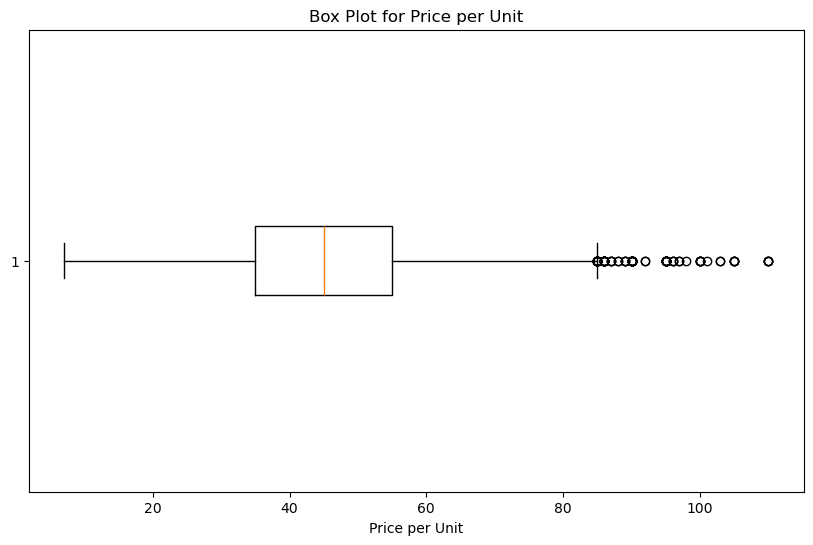

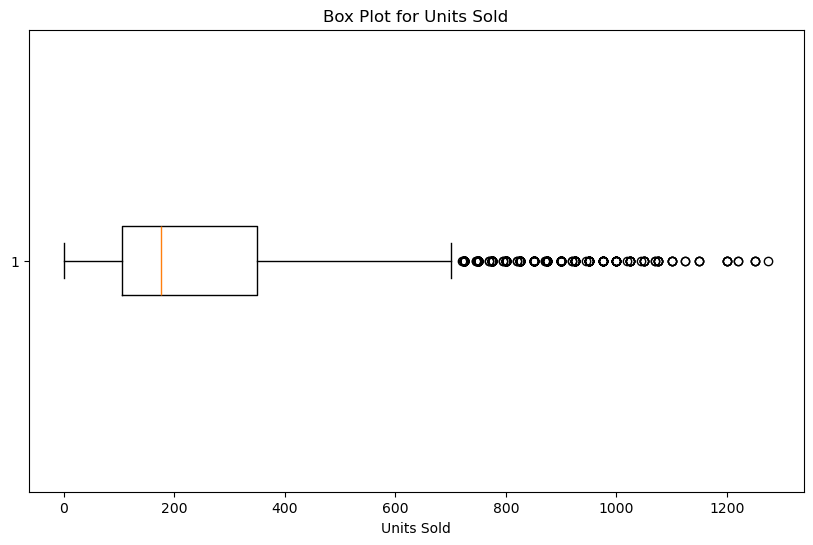

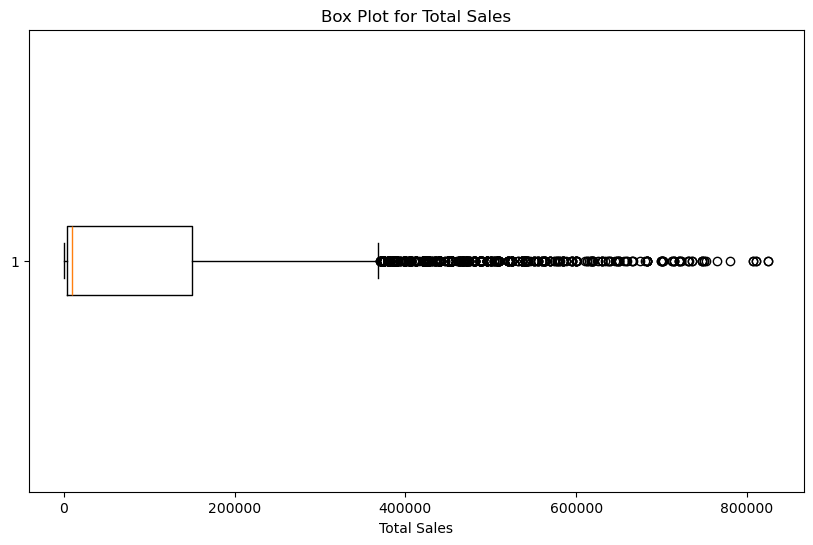

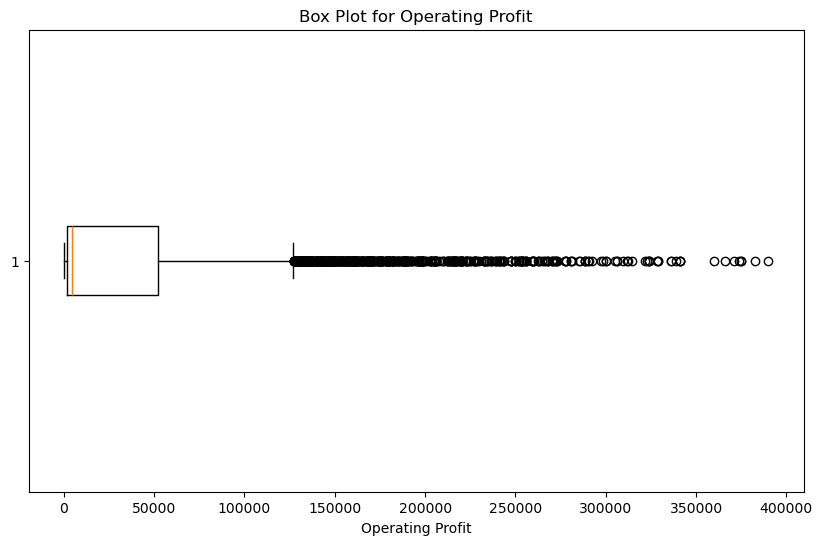

In [9]:
# Fungsi untuk membuat box plot
def plot_box(data, column):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

# Box plot untuk Price per Unit
plot_box(df, 'Price per Unit')

# Box plot untuk Units Sold
plot_box(df, 'Units Sold')

# Box plot untuk Total Sales
plot_box(df, 'Total Sales')

# Box plot untuk Operating Profit
plot_box(df, 'Operating Profit')

<h2>Outliers Handling</h2>

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier pada kolom Price per Unit
df_no_outliers = remove_outliers(df, 'Price per Unit')

# Menghapus outlier pada kolom Units Sold
df_no_outliers = remove_outliers(df_no_outliers, 'Units Sold')

# Menghapus outlier pada kolom Total Sales
df_no_outliers = remove_outliers(df_no_outliers, 'Total Sales')

# Menghapus outlier pada kolom Operating Profit
df_no_outliers = remove_outliers(df_no_outliers, 'Operating Profit')

# Tampilkan beberapa baris pertama dari dataframe tanpa outlier
df_no_outliers.head()


,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
285,NaN,Foot Locker,1185732,2021-06-01,West,California,Los Angeles,Men's Athletic Footwear,45.0,275,123750.0,43312.5,0.35,Outlet
286,NaN,Foot Locker,1185732,2021-06-02,West,California,Los Angeles,Women's Street Footwear,35.0,275,96250.0,33687.5,0.35,Outlet
287,NaN,Foot Locker,1185732,2021-06-03,West,California,Los Angeles,Women's Athletic Footwear,40.0,125,50000.0,20000.0,0.40,Outlet
288,NaN,Foot Locker,1185732,2021-06-04,Midwest,Illinois,Chicago,Men's Apparel,55.0,175,96250.0,33687.5,0.35,Outlet
291,NaN,Foot Locker,1185732,2021-06-07,Midwest,Illinois,Chicago,Men's Athletic Footwear,45.0,175,78750.0,27562.5,0.35,Outlet


<h2>Analisis Penjualan Berdasarkan Wilayah</h2>

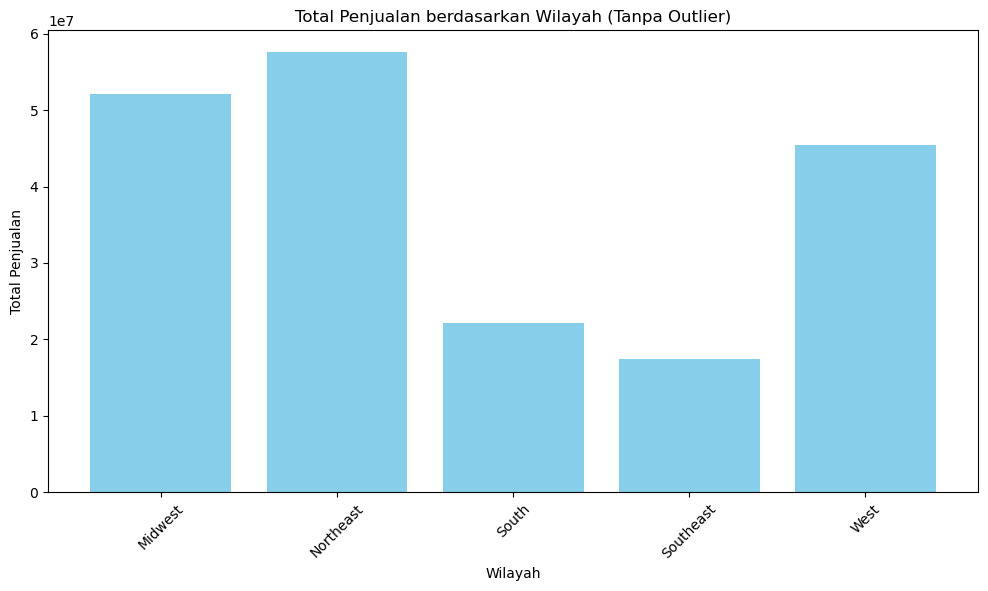

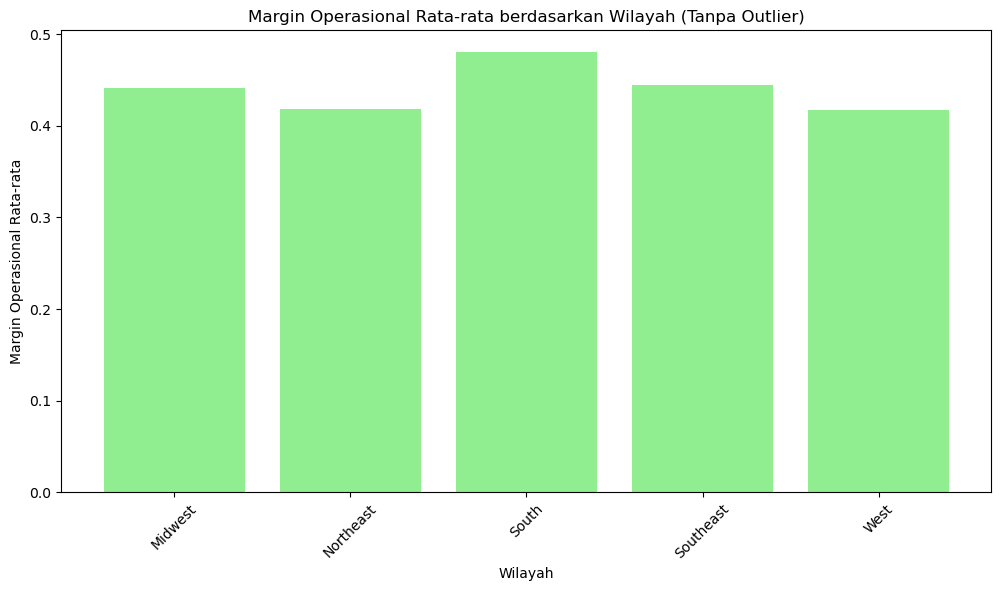

In [15]:
# Agregasi data berdasarkan Wilayah tanpa outlier
region_sales_no_outliers = df_no_outliers.groupby('Region')['Total Sales'].sum().reset_index()
region_profit_margin_no_outliers = df_no_outliers.groupby('Region')['Operating Margin'].mean().reset_index()

# Gabungkan kedua dataframe
region_data_no_outliers = pd.merge(region_sales_no_outliers, region_profit_margin_no_outliers, on='Region')

# Plot Total Penjualan berdasarkan Wilayah tanpa outlier
plt.figure(figsize=(12, 6))
plt.bar(region_data_no_outliers['Region'], region_data_no_outliers['Total Sales'], color='skyblue')
plt.xlabel('Wilayah')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan berdasarkan Wilayah (Tanpa Outlier)')
plt.xticks(rotation=45)
plt.show()

# Plot Margin Operasional Rata-rata berdasarkan Wilayah tanpa outlier
plt.figure(figsize=(12, 6))
plt.bar(region_data_no_outliers['Region'], region_data_no_outliers['Operating Margin'], color='lightgreen')
plt.xlabel('Wilayah')
plt.ylabel('Margin Operasional Rata-rata')
plt.title('Margin Operasional Rata-rata berdasarkan Wilayah (Tanpa Outlier)')
plt.xticks(rotation=45)
plt.show()


<h2>Analisis Penjualan Berdasarkan Kategori Produk</h2>

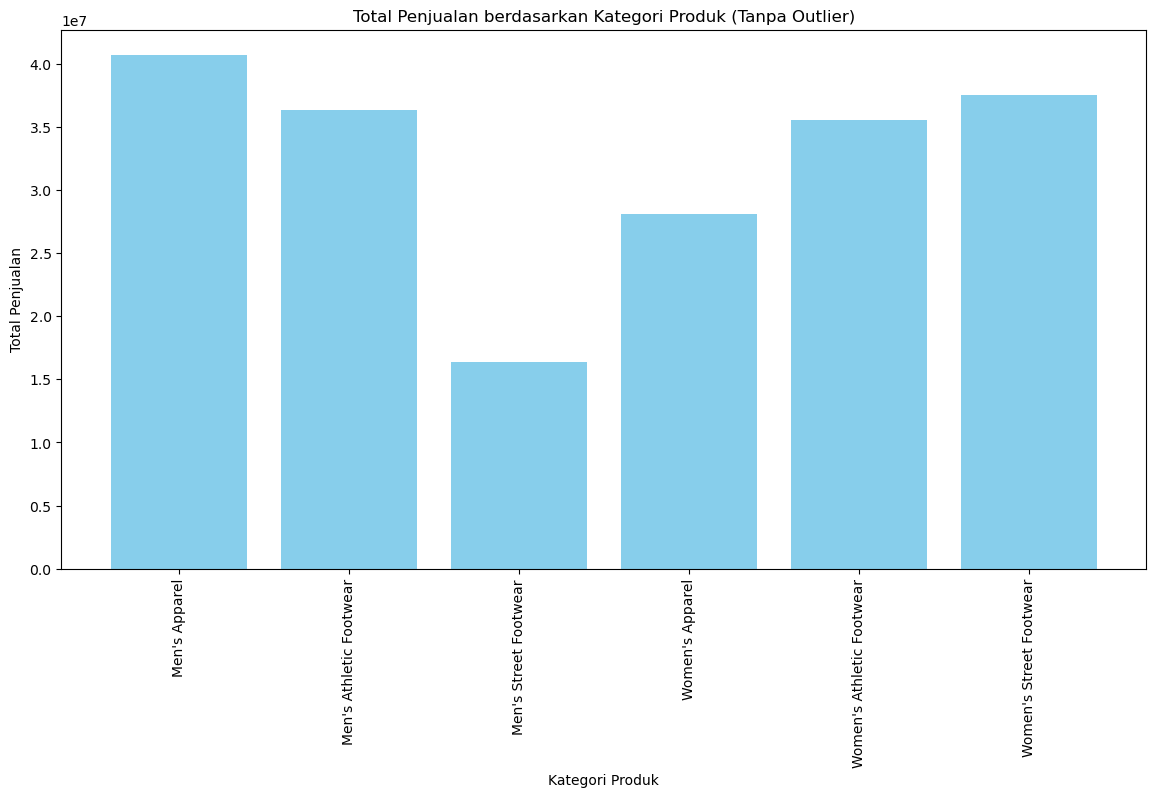

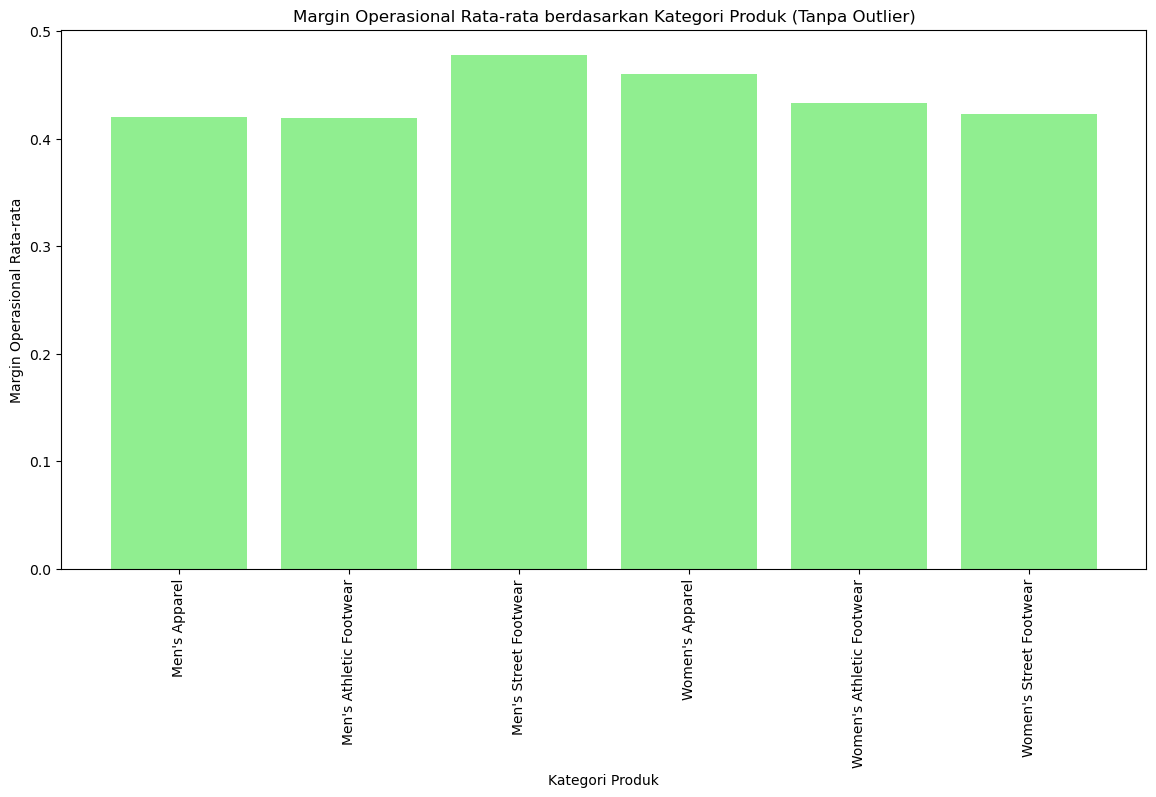

In [17]:
# Agregasi data berdasarkan Kategori Produk tanpa outlier
product_sales_no_outliers = df_no_outliers.groupby('Product')['Total Sales'].sum().reset_index()
product_profit_margin_no_outliers = df_no_outliers.groupby('Product')['Operating Margin'].mean().reset_index()

# Gabungkan kedua dataframe
product_data_no_outliers = pd.merge(product_sales_no_outliers, product_profit_margin_no_outliers, on='Product')

# Plot Total Penjualan berdasarkan Kategori Produk tanpa outlier
plt.figure(figsize=(14, 7))
plt.bar(product_data_no_outliers['Product'], product_data_no_outliers['Total Sales'], color='skyblue')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan berdasarkan Kategori Produk (Tanpa Outlier)')
plt.xticks(rotation=90)
plt.show()

# Plot Margin Operasional Rata-rata berdasarkan Kategori Produk tanpa outlier
plt.figure(figsize=(14, 7))
plt.bar(product_data_no_outliers['Product'], product_data_no_outliers['Operating Margin'], color='lightgreen')
plt.xlabel('Kategori Produk')
plt.ylabel('Margin Operasional Rata-rata')
plt.title('Margin Operasional Rata-rata berdasarkan Kategori Produk (Tanpa Outlier)')
plt.xticks(rotation=90)
plt.show()


<h2>Analisis Penjualan Berdasarkan Metode Penjualan</h2>

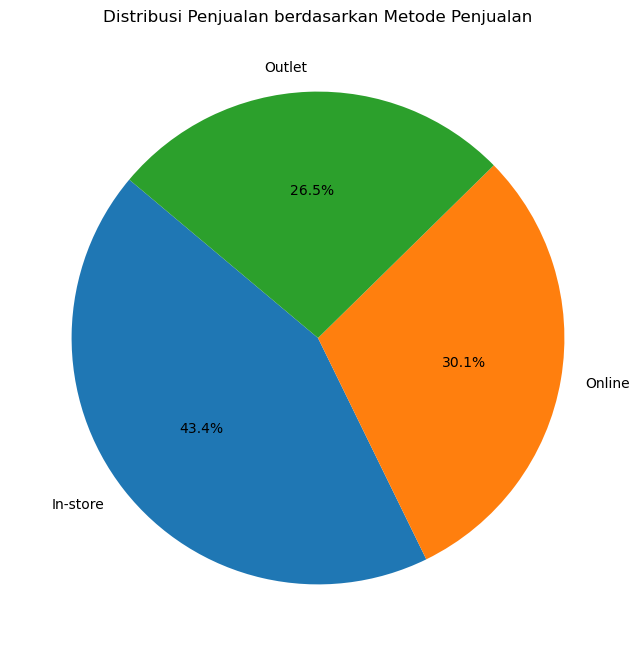

In [20]:
# Agregasi data berdasarkan Metode Penjualan tanpa outlier
sales_method_data_no_outliers = df_no_outliers.groupby('Sales Method')['Total Sales'].sum().reset_index()

# Plot Penjualan berdasarkan Metode Penjualan tanpa outlier
plt.figure(figsize=(8, 8))
plt.pie(sales_method_data_no_outliers['Total Sales'], labels=sales_method_data_no_outliers['Sales Method'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Penjualan berdasarkan Metode Penjualan')
plt.show()

<h2>Analisis Tren Penjualan</h2>

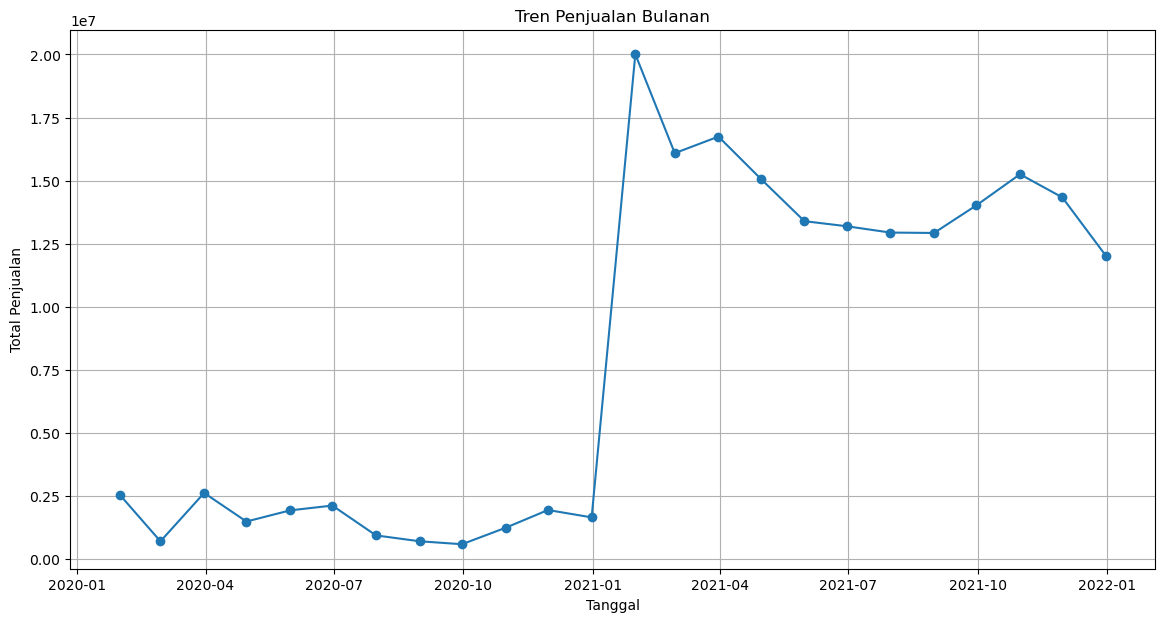

In [22]:
# Agregasi data penjualan berdasarkan bulan tanpa outlier
monthly_sales_no_outliers = df_no_outliers.set_index('Invoice Date').resample('M')['Total Sales'].sum().reset_index()

# Plot tren penjualan bulanan tanpa outlier
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_no_outliers['Invoice Date'], monthly_sales_no_outliers['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.title('Tren Penjualan Bulanan')
plt.grid(True)
plt.show()

<h2>Analisis Penjualan Toko/Retailer</h2>

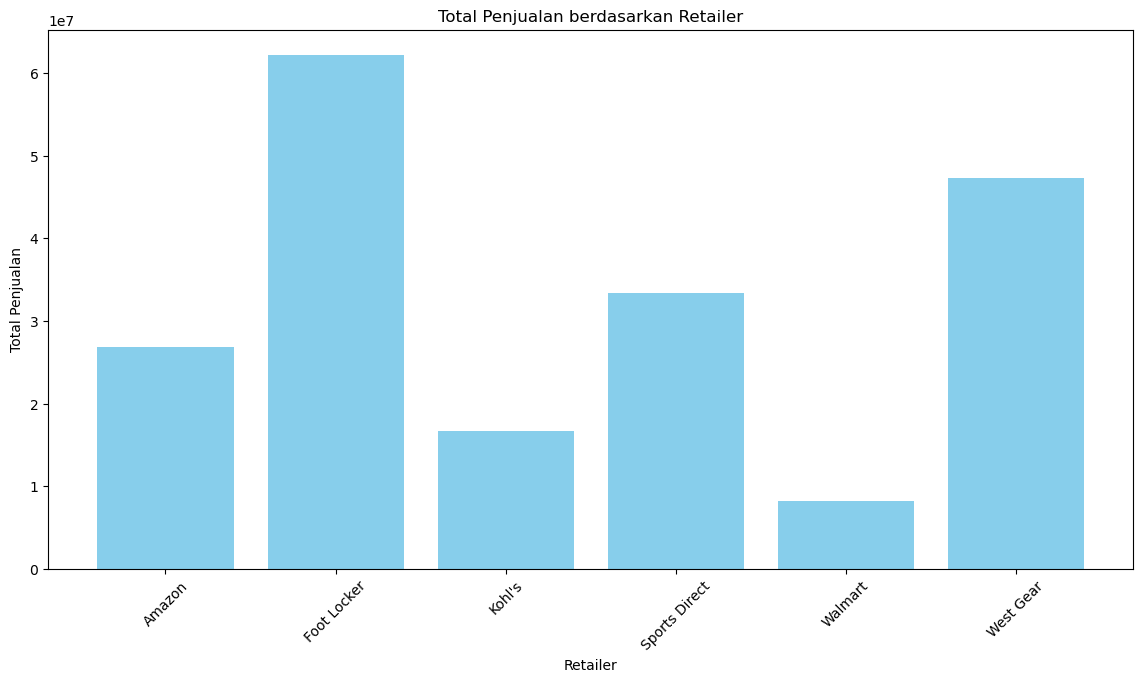

In [26]:
# Agregasi data berdasarkan Retailer tanpa outlier
retailer_sales_no_outliers = df_no_outliers.groupby('Retailer')['Total Sales'].sum().reset_index()

# Plot Total Penjualan berdasarkan Retailer tanpa outlier
plt.figure(figsize=(14, 7))
plt.bar(retailer_sales_no_outliers['Retailer'], retailer_sales_no_outliers['Total Sales'], color='skyblue')
plt.xlabel('Retailer')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan berdasarkan Retailer')
plt.xticks(rotation=45)
plt.show()

## Konklusi

1. **Kinerja Regional**: Beberapa wilayah secara signifikan mengungguli yang lain dalam hal total penjualan dan margin operasional.
2. **Kategori Produk**: Kategori produk tertentu menyumbang lebih banyak pada penjualan dan profitabilitas.
3. **Saluran Penjualan**: Distribusi penjualan antara saluran in-store dan online menunjukkan metode penjualan yang dominan.
4. **Tren Musiman**: Tren penjualan bulanan menunjukkan variasi musiman dalam kinerja penjualan.
5. **Kinerja Retailer**: Beberapa retailer menyumbang lebih signifikan pada total penjualan.l
## Rekomendasi
1. **Fokus pada Wilayah Berkinerja Tinggi**: Alokasikan lebih banyak sumber daya dan upaya pemasaran ke wilayah dengan penjualan dan profitabilitas tinggi.
2. **Optimalkan Campuran Produk**: Stok lebih banyak kategori produk yang berkinerja tinggi untuk meningkatkan penjualan dan margin keuntungan.
3. **Tingkatkan Saluran Penjualan**: Perkuat saluran penjualan yang dominan dan eksplorasi strategi untuk meningkatkan saluran yang kurang dominan.
4. **Manfaatkan Tren Musiman**: Rencanakan kampanye pemasaran dan inventaris berdasarkan pola penjualan musiman.
5. **Bermitra dengan Retailer Teratas**: Perkuat kemitraan dengan retailer berkinerja tinggi untuk memaksimalkan penjualan, pada contoh kasus ini adalah **Foot Locker** dan **West Gear**.

<blockquote>
Dengan melakukan analisis yang mendalam dan mengikuti rekomendasi yang diberikan, Adidas dapat mengoptimalkan operasional bisnis mereka, meningkatkan penjualan, dan memaksimalkan keuntungan.

**Before**

- Penjualan dan keuntungan mungkin tidak optimal.
- Kemungkinan persediaan yang tidak sesuai dengan permintaan pasar.
- Kurangnya wawasan tentang performa penjualan di berbagai wilayah.

**After**

- Penjualan dan keuntungan yang lebih tinggi melalui alokasi sumber daya yang lebih baik.
- Persediaan yang lebih efisien, mengurangi biaya penyimpanan dan kemungkinan out-of-stock.
- Keputusan pemasaran dan penjualan yang lebih baik didukung oleh data yang tepat.
</blockquote>te>.
an.
n.


